# Getting startred


### First: Install Nilearn's dependencies
Install the following packages using the distribution package manager: ipython, scipy, scikit-learn (sometimes called sklearn, or python-sklearn), matplotlib (sometimes called python-matplotlib) and nibabel (sometimes called python-nibabel).

If you do not have access to the package manager, we recommend that you install a complete 64 bit scientific Python distribution like Anaconda. Since it meets all the requirements of nilearn, it will save you time and trouble.

### Second: Install Nilearn in a Terminal

Open a Terminal console (if you press ctrl+alt+t, a Terminal console will pop up)
Then type the following comment and then press "Enter"

> pip install -U --user nilearn

In Google colab,

!pip install nilearn

### Third: Checking the installation of Nilearn

Open "Python" in the terminal by writing "python" and press "Enter".
Then type in the following line and press "Enter":

> In [1]: import nilearn

If no error occurs, you have installed nilearn correctly.

# Load fMRI sample data of the emotion prediction study [Kim et al., 2019] using Nilearn 

An artificial neural network with multiple hidden layers (known as a deep neural network, or DNN) was employed as a predictive model (DNNp) to predict emotional responses using whole-brain functional magnetic resonance imaging (fMRI) data from individual subjects (Kim et al., NeuroImage 2019). During fMRI data acquisition, 10 healthy participants listened to 80 International Affective Digital Sound stimuli and rated their own emotions generated by each sound stimulus in terms of the arousal, dominance, and valence dimensions. The whole-brain spatial patterns from a general linear model (i.e., beta-valued maps) for each sound stimulus and the emotional response ratings were used as the input and output for the DNNp, respectively.

<!DOCTYPE html>
<html>

<head>
    <meta charset="utf-8" />
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="viewport" content="width=device-width, initial-scale=1">
</head>

<body>
    <img src="https://drive.google.com/uc?export=view&id=1GzQBO1ry4XtrnaLjdG4kShSIqb1UuJKy">
</body>

</html>
  
Figure 1. (a) The task paradigm for each trial includes the participants listening to the sound stimulus followed by rating their emotional response for arousal, dominance, and valence via the SAMs with a nine-point scale. (b) Illustration of DNNP training used to predict the rated emotional responses using whole-brain beta-valued maps from the GLM derived from the affective sound phases. (c) Illustration of the nested five-fold CV procedure (see “Emotion prediction using a DNN-based predictive model (DNNP) in a nested five-fold cross-validation framework” in the Methods section for further details). GLM: general linear model. SAM: self-assessment manikin. SVMP: support vector machine based predictive model. CV: cross-validation.

In this tutorial, we are going to use a single-subject dataset including 80 beta value maps and valence scores 

In [0]:
import os
import numpy as np
import nilearn

/home/khc/miniconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


There is a NIfTI file in this directory called beta_maps_80trials.nii:

In [0]:
# Set data path 
data_path = '/users/khc/code/KHBM/emot_prediction/'
beta_filename = os.path.join(data_path, 'beta_maps_80trials.nii')

It is a 4D nifti file. We load it into the memory to print its shape.

In [0]:
from nilearn import image

# Load a Niimg-like object from filenames or list of filenames.
# beta_maps_80trials.nii is 4D data [x, y, z, number of samples]

print(image.load_img(beta_filename).shape)
[xdim, ydim, zdim, tdim] = image.load_img(beta_filename).shape

(53, 63, 46, 80)


We can retrieve the first volume (note that Python indexing starts at i):

In [0]:
from nilearn import plotting

# Indexes into a 4D Niimg-like object in the fourth dimension.
# Common use cases include extracting a 3D image out of img or
# creating a 4D image whose data is a subset of img data.
# Result can be nibabel.Nifti1Image or the input, as-is. 
# It is guaranteed that the returned object has get_data() and affine attributes.
image_mem = image.index_img(beta_filename,1)

# Arrays should be passed in numpy convention: (x, y, z) ordered.
# For visualization, non-finite values found in passed ‘stat_map_img’ or ‘bg_img’ are set to zero.
plotting.plot_stat_map(image_mem, display_mode="z")

In [0]:
# For volumetric data, nilearn works with data stored as in the Nifti structure (via the nibabel package).
# The NifTi data structure (also used in Analyze files) is the standard way of sharing data in neuroimaging research. 
# Three main components are:
# data:raw scans in form of a numpy array: data = img.get_data()
# affine: the transformation matrix that maps from voxel indices of the numpy array to actual 
#         real-world locations of the brain: affine = img.affine
# header:low-level informations about the data (slice duration, etc.): header = img.header

# We can accesss data from NifTi data
mat = image_mem.get_data()

# Transformation matrix
image_mem.affine

array([[  -3.,    0.,    0.,   78.],
       [   0.,    3.,    0., -112.],
       [   0.,    0.,    3.,  -50.],
       [   0.,    0.,    0.,    1.]])

<!DOCTYPE html>
<html>

<head>
    <meta charset="utf-8" />
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="viewport" content="width=device-width, initial-scale=1">
</head>

<body>
    <img src="https://drive.google.com/uc?export=view&id=1GMD7u3GGToaagRDteUspYruHypwkPtuo">
</body>

</html>

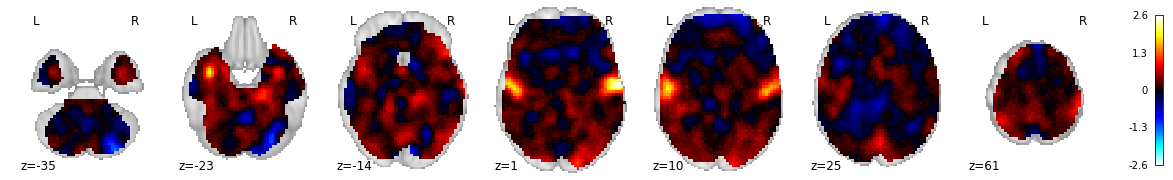

In [0]:
import nibabel as nib

# NiBabel
# Read / write access to some common neuroimaging file formats
# This package provides read +/- write access to some common medical and neuroimaging file formats,
# including: ANALYZE (plain, SPM99, SPM2 and later), GIFTI, NIfTI1, NIfTI2, CIFTI-2, 
# MINC1, MINC2, AFNI BRIK/HEAD, MGH and ECAT as well as Philips PAR/REC. 
# We can read and write FreeSurfer geometry, annotation and morphometry files. 
# There is some very limited support for DICOM. NiBabel is the successor of PyNIfTI.
# The various image format classes give full or selective access to 
# header (meta) information and access to the image data is made available via NumPy arrays.

sample = nib.Nifti1Image(mat,image_mem.affine)
plotting.plot_stat_map(sample, display_mode="z")

## Generating a binary mask using all samples

In [0]:
#  Generating a 4-D empty tensor to store binary maps from the sample data
stack_mat3d = np.zeros((xdim,ydim,zdim,tdim))

for ii in range(tdim):
    # Retrieve every sample data from nii file and get as 3D array
    image_mem = image.index_img(beta_filename, ii)
    mat3d = image_mem.get_data()
    
    # Extracting nonzero values in the whole brain, corresponding indices are being 1
    mat3d[np.nonzero(mat3d)] = 1
    stack_mat3d[:,:,:,ii] = mat3d

In [0]:
# sum up across voulmes, trials or  samples
# xdim: axis=0, ydim: axis=1, zdim: axis=2, tdim: axis=3
sum_stack_mat3d = np.sum(stack_mat3d,axis=3) [0: ]
sum_stack_mat3d.shape

# Intuitively, np.where is like asking "tell me where in this array, entries satisfy a given condition".
# Finding only voxels whose value is equal to the number of volumes, trials or samples 
map_index = np.where(sum_stack_mat3d==tdim)
map_index[0].shape

(55417,)

In [0]:
# Generating a binary mask using index information 
mask_map = np.zeros((xdim,ydim,zdim))
mask_map[map_index] = 1

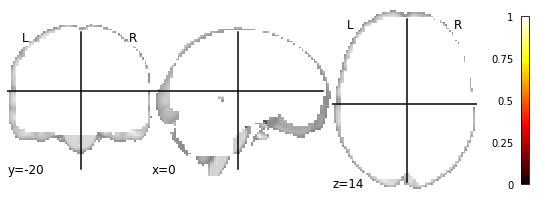

In [0]:
# Check the 3D binary mask using a NiBabel function
mask_map_mem = nib.Nifti1Image(mask_map,image_mem.affine)

plotting.plot_stat_map(mask_map_mem)
# plotting.plot_stat_map(mask_map_mem,cut_coords=[36, -27, 66])

In [0]:
# Saving this mask image to a NIFIT file
nib.save(mask_map_mem,os.path.join(data_path, 'mask_map.nii'))

# Making a 2-D matrix for DNN input 

In [0]:
# Deep neural networks such feedforward neuronal network, autoencoder, and so on typically uses a 2-D matrix form
# as input data. Thus, using index information from the binary mask, we can generate 2-D matrix from the sample data

# Generate a empty 2D matrix whose dimension is the number of samples x the number of in-brain voxels, [80 x 55417]
mat2d = np.zeros((tdim,map_index[0].shape[0]))

for ii in range(tdim):
    # Retrieve every sample data from nii file and get as 3D array
    image_mem = image.index_img(beta_filename, ii)
    mat3d = image_mem.get_data()
    # Only extracting beta values within the in-brain part using the index information
    mat2d[ii,:] = mat3d[map_index]

mat2d.shape 


(80, 55417)

# Double-checking the generated 2D matrix for DNN input data 

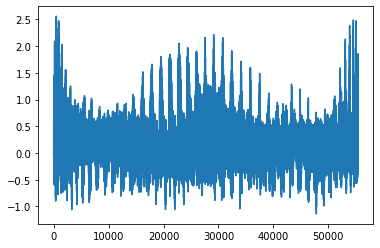

In [0]:
import matplotlib.pyplot as plt

# To be sure, we should check whether beta values correctly are stored into the 2D matrix
plt.plot(mat2d[0,:])
plt.show()

# Save as a "mat" file by splitting input data

In [0]:
# The module for file input and output
import scipy.io as sio
import scipy.stats # This module contains a large number of probability distributions as well as a growing library of statistical functions.

save_datapath = "/users/khc/code/KHBM/emot_prediction/"

load_emot_resp_data = sio.loadmat('%s/sample_valence.mat' % (save_datapath)) 

valence_score = load_emot_resp_data['Y']

# z-score for each sample
z_mat2d = scipy.stats.zscore(mat2d,axis=1,ddof=1)
   
# Cross validation 
nfld = 5; #
nsample_nfld = int(tdim/nfld)

# Here, we simply select brain maps from the first one as training data set
train_x = z_mat2d[0:nsample_nfld*4,:]; train_y = valence_score[0:nsample_nfld*4,:]
print(train_x.shape)
print(train_y.flatten())

# Remaining samples are selected as test data set
test_x = z_mat2d[nsample_nfld*4:tdim,:]; test_y = valence_score[nsample_nfld*4:tdim,:]

print(test_x.shape)
print(test_y.flatten())

sio.savemat(save_datapath+"/emt_valence_sample_zscore.mat", 
            mdict={'train_x':train_x, 'train_y':train_y, 'test_x': test_x,'test_y':test_y})


(64, 55417)
[3. 5. 2. 2. 5. 5. 2. 5. 3. 2. 8. 2. 7. 4. 5. 7. 2. 5. 5. 3. 2. 5. 4. 7.
 3. 8. 3. 5. 7. 4. 2. 3. 5. 5. 5. 5. 5. 7. 2. 4. 7. 5. 5. 5. 7. 6. 2. 5.
 5. 6. 5. 5. 4. 5. 4. 5. 5. 2. 5. 5. 6. 5. 4. 2.]
(16, 55417)
[2. 5. 5. 2. 4. 4. 2. 5. 5. 2. 4. 6. 3. 3. 6. 5.]
